# Non-Linear advection-diffusion equation

$$\begin{align*}
    \partial_tu(x,t)  + \frac12 \partial_x \Big(u(x,t)^2\Big) &= \epsilon\partial_{xx}u(x,t), & & & & & -1 &< x <1,\quad t > 0\\
            u(-1,t) &= g_L(t),  & & & & & t &> 0, \\
            u(1, t) &= g_R(t),  & & & & & t &> 0, \\ 
            u(x, 0) &= \eta(x), & & & & & -1 &\leq x \leq 1
\end{align*}$$

### Check that the suggested solution is correct

In [17]:
from sympy import init_printing, symbols, diff, tanh, Equivalent, Eq
init_printing()

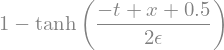

In [6]:
x, eps, t = symbols("x epsilon t")
u = -tanh((x + 0.5 - t) / (2*eps)) + 1
u

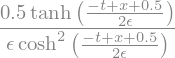

In [28]:
LHS = diff(u, t) + 0.5*diff(u**2, x)
LHS = LHS.simplify()
LHS

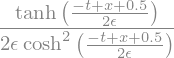

In [29]:
RHS = eps*diff(u, x,2)
RHS = RHS.simplify()
RHS

In [30]:
Eq(LHS, RHS)

# FD scheme

Approximate the diffusion part as central space, and the advection part a backward space, and finally the timederivative using forward time


$$\begin{align}
    \partial_t u(x_i,t_n) &\approx  \frac{U_i^{n+1} - U_i^{n}}{k} \\
    \epsilon\partial_{xx} u(x_i,t_n) &\approx \epsilon\frac{U_{i+1}^n - 2U_i^n + U_{i-1}^n}{h^2} \\
    \frac{1}{2}\partial_x \Big(u(x_i,t_n)^2\Big) = \frac{1}{2}\partial_x F(U_i^n) &\approx \frac{1}{2} \left(\frac{F(U_{i}^n) - F(U_{i-1}^n)}{\kappa}\right)
\end{align}$$

# Determing stability using method from exercise 3

$$\begin{align}
    U_j^{n+1} &= U_j^n - \frac{k}{2h}\Big(F(U_j^n) - F(U_{j-1}^n)\Big) + \frac{k\epsilon}{h^2}\Big(U_{j+1}^n - 2U_j^n + U_{j-1}^n\Big) \\
    
    \xi^{n+1}e^{ijh} &= \xi^ne^{i jh} - \frac{k}{2h}\left( \Big(\xi^ne^{ijh}\Big)^2 + \Big(\xi^ne^{i(j-1)h}\Big)^2 \right) + \frac{k\epsilon}{h^2}\left( \xi^n e^{i(j+1)h} - \xi^ne^{i jh} + \xi^ne^{i(j-1)h}\right),\quad U_j^{n} = \xi^ne^{i jh} \\
    \xi^{n+1}e^{ijh} &= \xi^ne^{i jh} - \frac{k}{2h}\left( \xi^ne^{2ijh} + \xi^ne^{2i(j-1)h} \right) + \frac{k\epsilon}{h^2}\left( \xi^n e^{i(j+1)h} - \xi^ne^{i jh} + \xi^ne^{i(j-1)h}\right),\quad U_j^{n} = \xi^ne^{i jh}

\end{align}$$

$$\begin{align}
    \xi &= 1 - \frac{k}{2h}\left(\xi^ne^{ijh} + \xi^ne^{i(j-2)h}\right) + \frac{k\epsilon}{h^2}\left(e^{ih} - 2 + e^{-ih}\right)
\end{align}$$